# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.045072e+01     8.131622e+00
 * time: 0.0018041133880615234
     1     2.939678e+01     4.542715e+00
 * time: 0.008643150329589844
     2     2.047917e+01     4.937191e+00
 * time: 0.01669001579284668
     3     1.475820e+01     3.981438e+00
 * time: 0.021882057189941406
     4     1.199644e+01     1.379377e+00
 * time: 0.026808977127075195
     5     1.103962e+01     2.886440e+00
 * time: 0.031045198440551758
     6     1.035794e+01     1.169072e+00
 * time: 0.03484201431274414
     7     9.492877e+00     1.471102e+00
 * time: 0.03862905502319336
     8     9.111475e+00     1.359920e+00
 * time: 0.04258108139038086
     9     8.939019e+00     8.481204e-01
 * time: 0.046730995178222656
    10     8.771397e+00     8.169865e-01
 * time: 0.05112814903259277
    11     8.621885e+00     7.631676e-01
 * time: 0.055314064025878906
    12     8.459400e+00     4.219257e-01
 * time: 0.059487104415893555
    13     8.400567e+00     1.000271e+00

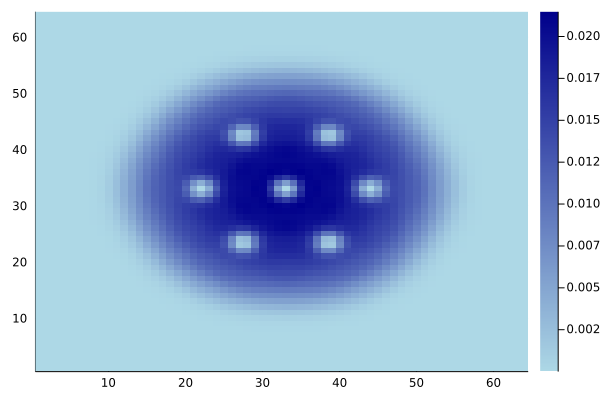

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)